# Laboratorium 8 - Page Rank (Wojciech Kosztyła)

___

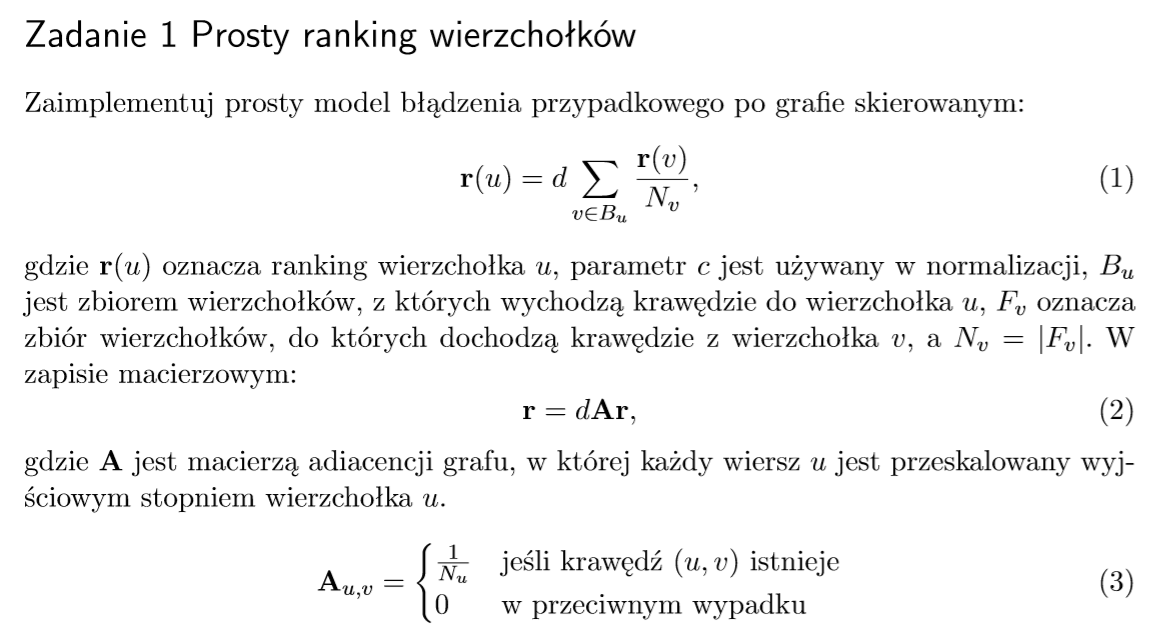
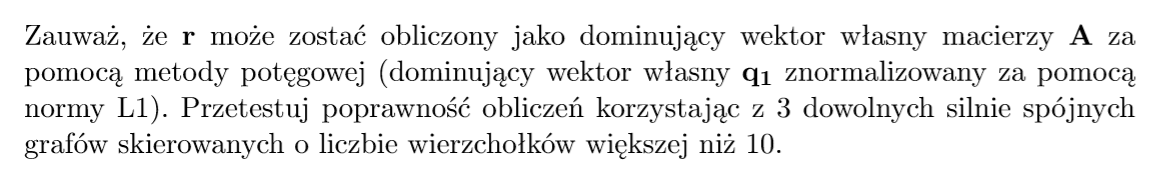

___


In [1]:
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib

import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

You should consider upgrading via the 'c:\users\wojciech\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\wojciech\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Rozpocząłem od stworzenia funkcji generujących losowy silnie spójny graf skierowany.

In [2]:
def create_random_directed_graph(nodes, edges):
    temp_graph = nx.DiGraph()
    temp_graph.add_nodes_from(range(nodes))
    for i in range(edges):

        node_from = random.randint(0, nodes-1)
        node_to =   random.randint(0, nodes-1)

        while (node_from, node_to) in temp_graph.edges:
            node_from = random.randint(0, nodes - 1)
            node_to =   random.randint(0, nodes - 1)

        temp_graph.add_edge(node_from, node_to)
    return temp_graph


def create_random_strongly_connected_directed_graph(nodes, min_edges):
    temp_graph = create_random_directed_graph(nodes, min_edges)
    while not nx.is_strongly_connected(temp_graph):

        node_from = random.randint(0, nodes-1)
        node_to = random.randint(0, nodes-1)

        while (node_from, node_to) in temp_graph.edges:
            node_from = random.randint(0, nodes-1)
            node_to = random.randint(0, nodes-1)

        temp_graph.add_edge(node_from, node_to)
    return temp_graph

Napisałem również funkcję, tworzącą i ew. zapisującą graficzną reprezentację grafu.

In [3]:
def show_graph(graph, save=False, name=""):
    filename = "graph-{}__nodes-{}__edges-{}.png".format(name, graph.number_of_nodes(), graph.number_of_edges())

    print("Rozpoczynam generowanie " + filename)
    
    

    fig1, ax1 = plt.subplots(figsize=(20,10))

    ax1.set_title(name)
    nx.draw(graph, pos=nx.circular_layout(graph))
    nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph))

    fig1.show()
    if save:
        fig1.savefig("zad1/plots/" + filename)
        print("Plik " + filename + " został zapisany.")
        pass
    else:
        print("Skończone generowanie " + filename)

Przetestuję teraz generacje grafów jak i ich wyświetlanie.

Rozpoczynam generowanie graph-__nodes-6__edges-18.png
Skończone generowanie graph-__nodes-6__edges-18.png
Rozpoczynam generowanie graph-__nodes-10__edges-27.png
Skończone generowanie graph-__nodes-10__edges-27.png


<ipython-input-3-3a1809c1c454>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


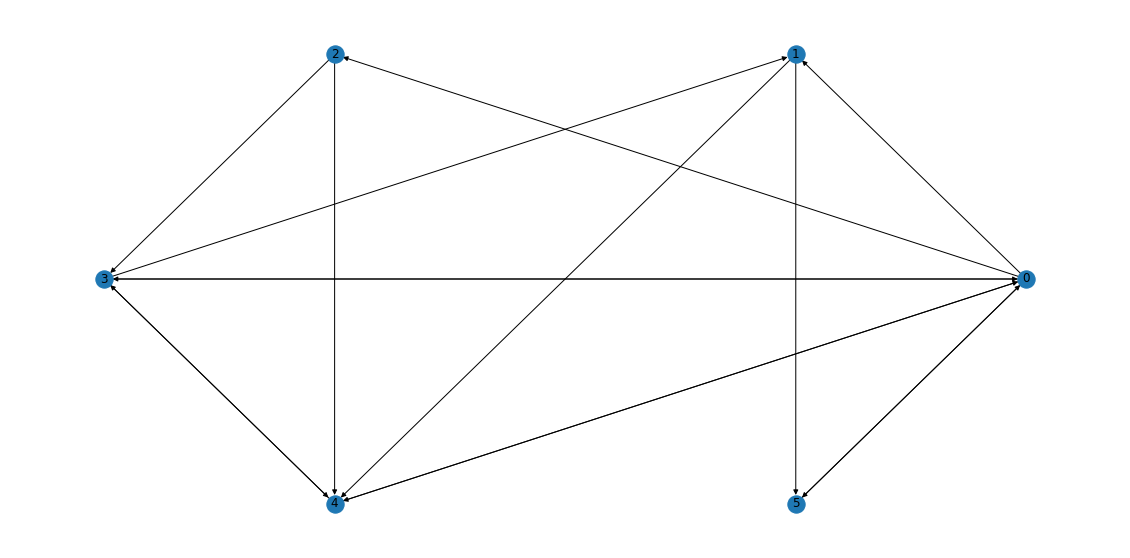

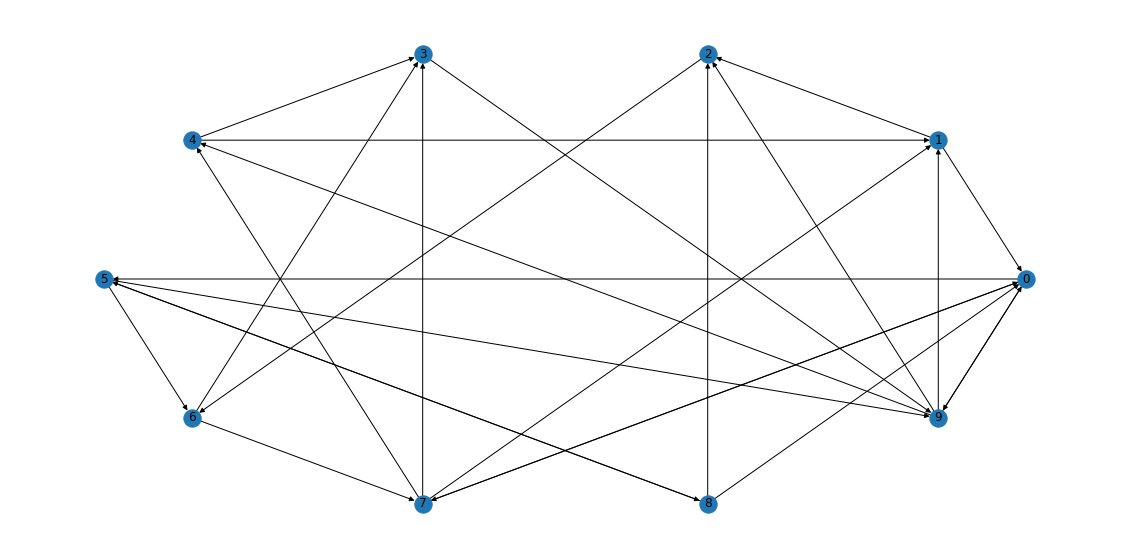

In [4]:
show_graph(create_random_strongly_connected_directed_graph(6, 6))
show_graph(create_random_strongly_connected_directed_graph(10, 6))

Następnie utworzyłem funkcję do tworzenia tej zmodyfikowanej macierzy adjacencji (A_u,v)

In [5]:
def create_adjacency_matrix(graph):
    matrix_A = nx.to_numpy_array(graph)
    for node_a in graph.nodes():
        counter = 0
        for cell in matrix_A[node_a]:
            counter = counter + cell
        if counter!=0:
            matrix_A[node_a] /= counter
    return np.transpose(matrix_A)

[[0.   0.   0.25 0.  ]
 [1.   0.   0.25 0.5 ]
 [0.   1.   0.25 0.  ]
 [0.   0.   0.25 0.5 ]]
Rozpoczynam generowanie graph-__nodes-4__edges-8.png
Skończone generowanie graph-__nodes-4__edges-8.png


<ipython-input-3-3a1809c1c454>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


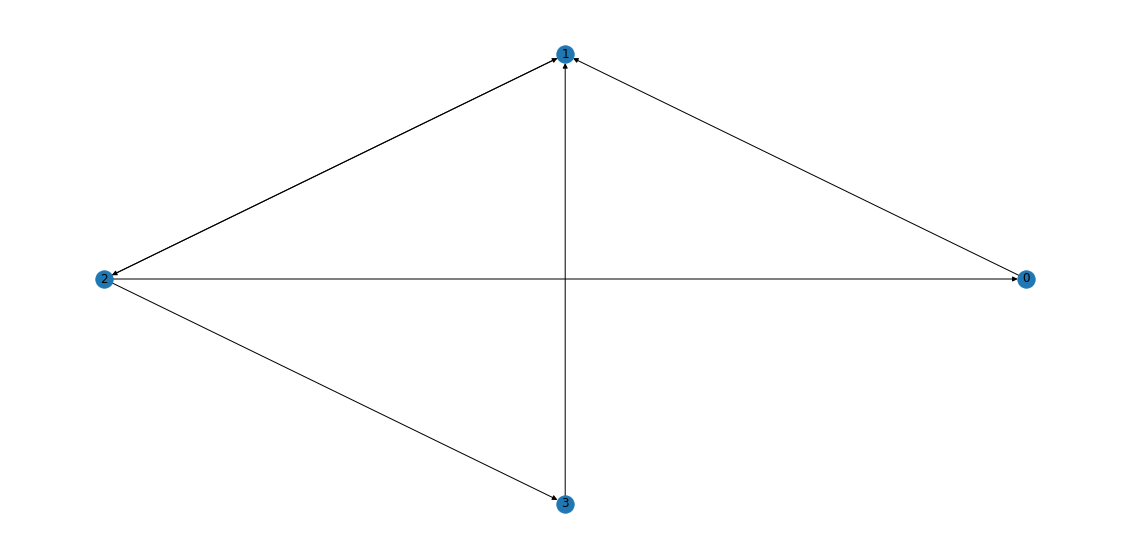

In [6]:
g = create_random_strongly_connected_directed_graph(4,0)
print(create_adjacency_matrix(g))
show_graph(g)

Napisałem funkcję do tworzenia dominującego wektora własnego macierzy (skorzystałem z algorytmu w załączonym do zadania pliku "The PageRank Citation Ranking: Bringing Order to the Web").

In [7]:
def metoda_potegowa__wektor_dom_wlasny(macierz):

    n = len(macierz)
    wektor = np.random.rand(n, 1)
    roznica = 99999

    i = 0
    while (i < 100000 and roznica > 0.0000000001):
        wektor_next = macierz @ wektor
        wektor_next = wektor_next / np.linalg.norm(wektor_next, ord=1)
        roznica = np.linalg.norm(wektor - wektor_next, ord=1)

        wektor = wektor_next
        i = i+1

    return wektor

In [45]:
metoda_potegowa__wektor_dom_wlasny(create_adjacency_matrix(create_random_directed_graph(3,4)))

array([[0.29875356],
       [0.10373932],
       [0.59750712]])

Przy zaimplementowanej metodzie potęgowej wystarczy napisać prostą funkcję

In [9]:
def simple_page_rank(graph):
    temp_adjacency_matrix = create_adjacency_matrix(graph)
    temp_vector = metoda_potegowa__wektor_dom_wlasny(temp_adjacency_matrix)
    return temp_vector

In [10]:
temp1_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(10,0))
temp2_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(20,0))
temp3_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(30,0))

print(np.linalg.norm(temp1_simple_page_rank, ord=1))
print(np.linalg.norm(temp2_simple_page_rank, ord=1))
print(np.linalg.norm(temp3_simple_page_rank, ord=1))

1.0
1.0
1.0000000000000002


Wartości norm wynoszą w przybliżeniu 1, więc zakładam że algorytm działa jak należy (suma rankingów wszystkich wierzchołków jest unormowana).

Z powodu, że generowane przeze mnie grafy mają całkowicie losowo generowane krawędzie,
simple_page_rank() często zwraca wektory, które mają takie same wartości w każdym z wierzchołków (np. [0.25, 0.25, 0.25, 0.25]).

Postanowiłem stworzyć jeden graf ręcznie. (poniżej)

In [11]:
def create_template1_graph():
    temp_graph = nx.DiGraph()
    temp_graph.add_nodes_from(range(5))
    temp_graph.add_edge(0, 1)
    temp_graph.add_edge(1, 2)
    temp_graph.add_edge(2, 3)
    temp_graph.add_edge(2, 4)
    temp_graph.add_edge(3, 0)
    temp_graph.add_edge(4, 0)
    return temp_graph

[[0.34273965]
 [0.05845728]
 [0.34678748]
 [0.1260078 ]
 [0.1260078 ]]
1.0
Rozpoczynam generowanie graph-__nodes-5__edges-6.png
Skończone generowanie graph-__nodes-5__edges-6.png


<ipython-input-3-3a1809c1c454>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


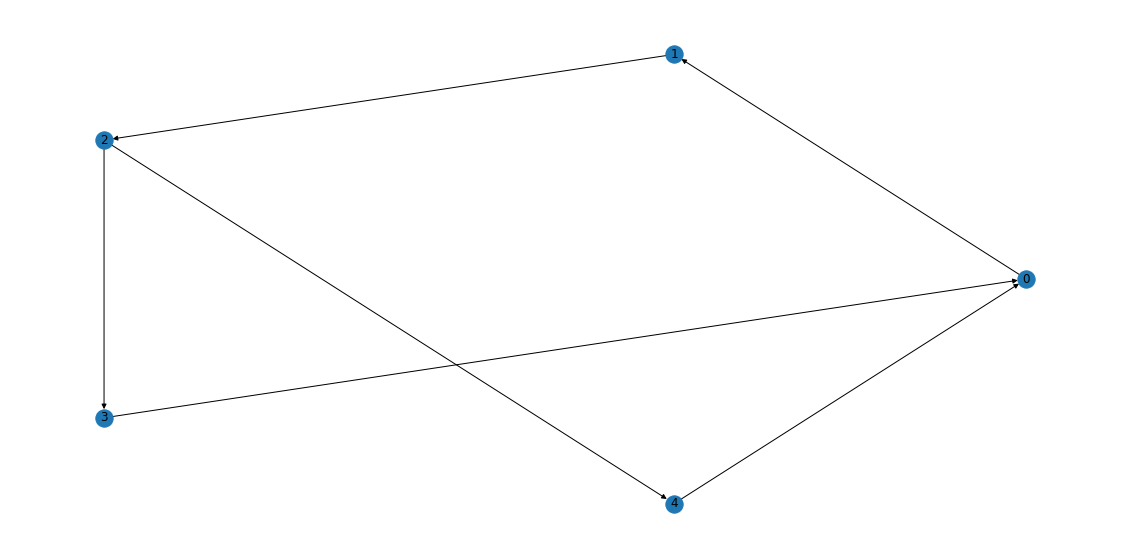

In [12]:
temp_graf = create_template1_graph()
print(simple_page_rank(temp_graf))
print(np.linalg.norm(simple_page_rank(temp_graf), ord=1))
show_graph(temp_graf)

Poniżej przykład z "The PageRank Citation Ranking: Bringing Order to the Web"

[[0.4]
 [0.2]
 [0.4]]
Rozpoczynam generowanie graph-__nodes-3__edges-4.png
Skończone generowanie graph-__nodes-3__edges-4.png


<ipython-input-3-3a1809c1c454>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


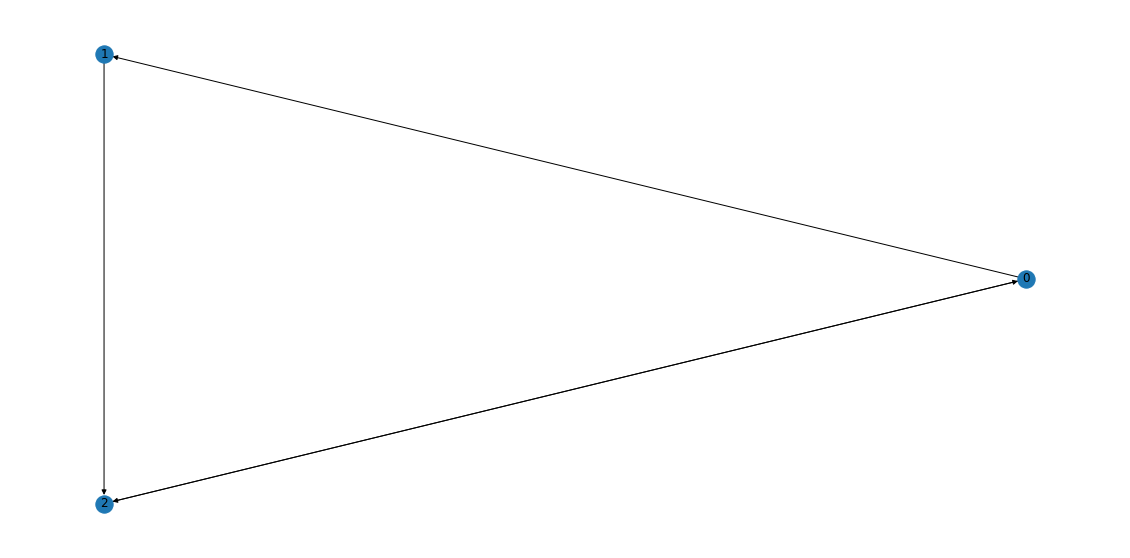

In [13]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2])
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(0,2)

print(simple_page_rank(G))
show_graph(G)

In [14]:
def create_template2_graph():
    temp_graph = nx.DiGraph()
    temp_graph.add_nodes_from(range(13))
    temp_graph.add_edge(0, 1)
    temp_graph.add_edge(0, 4)
    temp_graph.add_edge(1, 4)
    temp_graph.add_edge(1, 2)
    temp_graph.add_edge(1, 5)
    temp_graph.add_edge(1, 11)
    temp_graph.add_edge(1, 8)
    temp_graph.add_edge(2, 6)
    temp_graph.add_edge(3, 1)
    temp_graph.add_edge(3, 7)
    temp_graph.add_edge(4, 8)
    temp_graph.add_edge(5, 2)
    temp_graph.add_edge(5, 8)
    temp_graph.add_edge(6, 5)
    temp_graph.add_edge(6, 7)
    temp_graph.add_edge(6, 9)
    temp_graph.add_edge(7, 1)
    temp_graph.add_edge(8, 4)
    temp_graph.add_edge(8, 3)
    temp_graph.add_edge(8, 0)
    temp_graph.add_edge(9, 5)
    temp_graph.add_edge(10, 8)
    temp_graph.add_edge(10, 11)
    temp_graph.add_edge(11, 8)
    temp_graph.add_edge(11, 9)
    temp_graph.add_edge(11, 12)
    temp_graph.add_edge(12, 3)
    temp_graph.add_edge(12, 6)
    temp_graph.add_edge(12, 9)
    temp_graph.add_edge(12, 10)
    return temp_graph

[[0.07201405]
 [0.13466042]
 [0.07055035]
 [0.07435597]
 [0.13495316]
 [0.08723653]
 [0.07289227]
 [0.06147541]
 [0.21604215]
 [0.03600703]
 [0.00234192]
 [0.02810304]
 [0.00936768]]
1.0
Rozpoczynam generowanie graph-__nodes-13__edges-30.png
Skończone generowanie graph-__nodes-13__edges-30.png


<ipython-input-3-3a1809c1c454>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


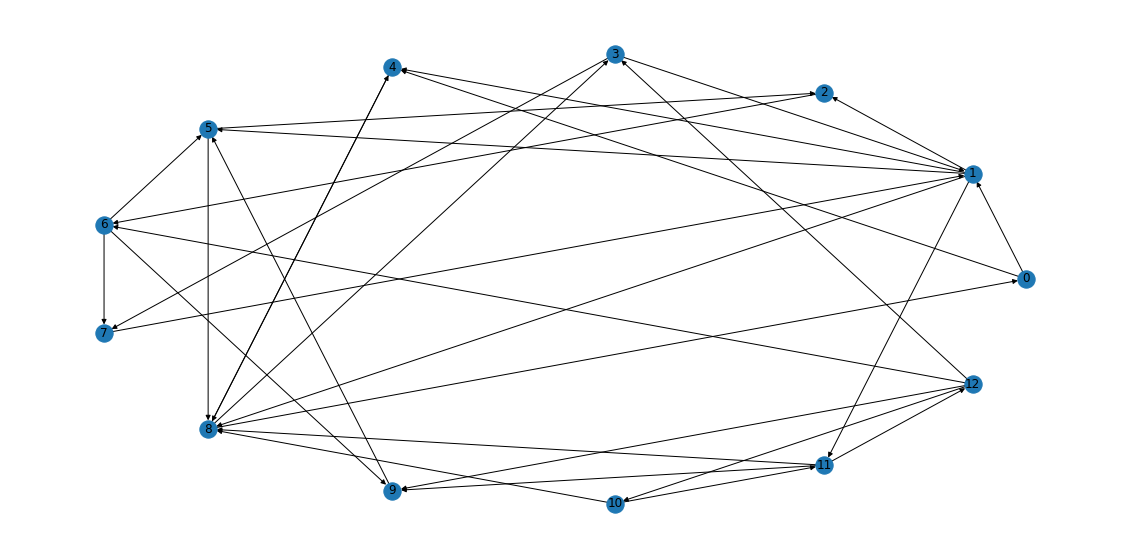

In [15]:
temp_graf = create_template2_graph()
print(simple_page_rank(temp_graf))
print(np.linalg.norm(simple_page_rank(temp_graf), ord=1))
show_graph(temp_graf)

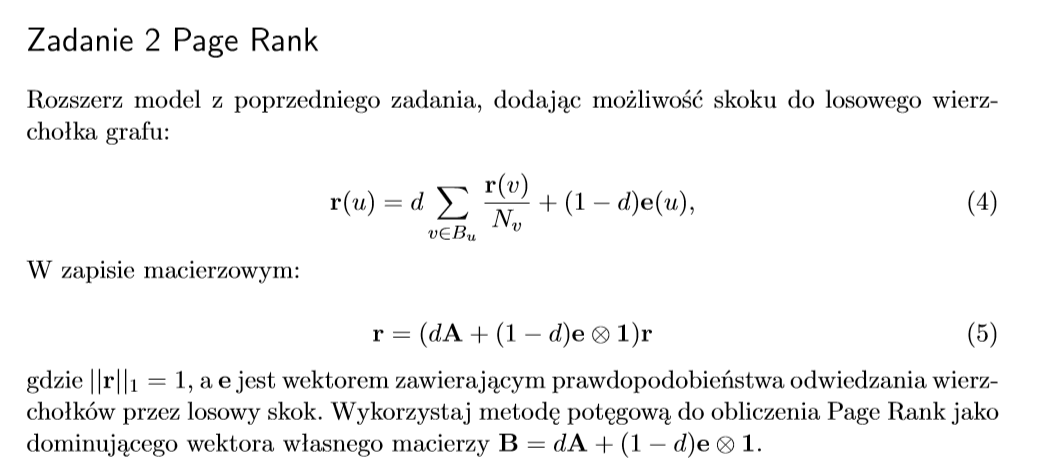
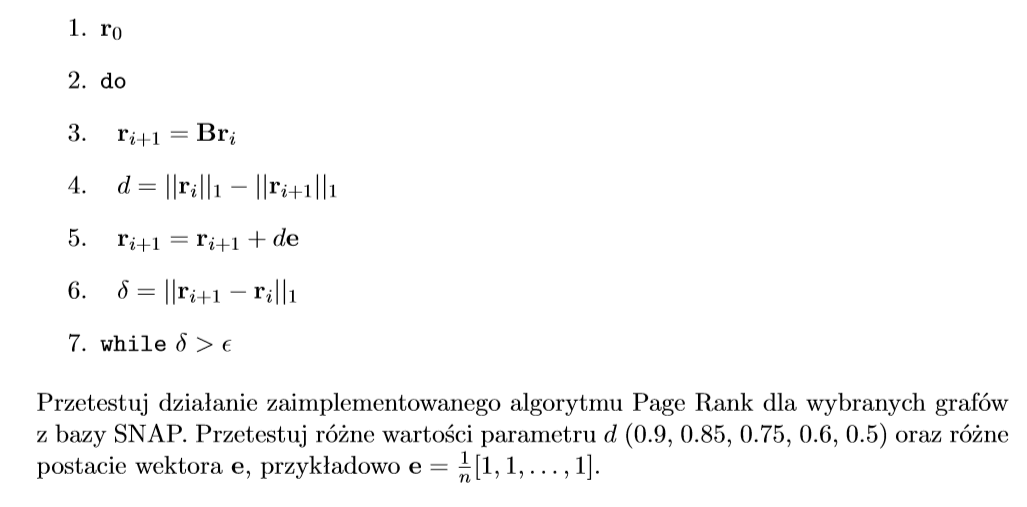

Jako że e jest wektorem zawierającym prawdopodobieństwa odwiedzania wierzchołków przez losowy skok, tworzę funkcję go tworzącą.

In [16]:
def create_default_e(graph):
    n = nx.number_of_nodes(graph)
    print(n)
    e = np.zeros((1, n))
    i = 0
    for node_a, node_b in graph.edges():
        e[0][node_b] += 1
        i += 1
    return e/i

Moją wcześniejszą funkcję simple_page_rank() mogę lekko zmodyfikować aby spełniała warunki full_page_rank()

In [17]:
def full_page_rank(graph, e, d):
    temp_adjacency_matrix = create_adjacency_matrix(graph)
    n = len(temp_adjacency_matrix)
    matrix_B = d * temp_adjacency_matrix + (1-d)*np.dot(e, np.diag(np.full(n, 1)))

    temp_vector = metoda_potegowa__wektor_dom_wlasny(matrix_B)
    return temp_vector

3
[[0.4]
 [0.2]
 [0.4]]
Rozpoczynam generowanie graph-__nodes-3__edges-4.png
Skończone generowanie graph-__nodes-3__edges-4.png
3
[[0.38728828]
 [0.21544542]
 [0.39726629]]


<ipython-input-3-3a1809c1c454>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


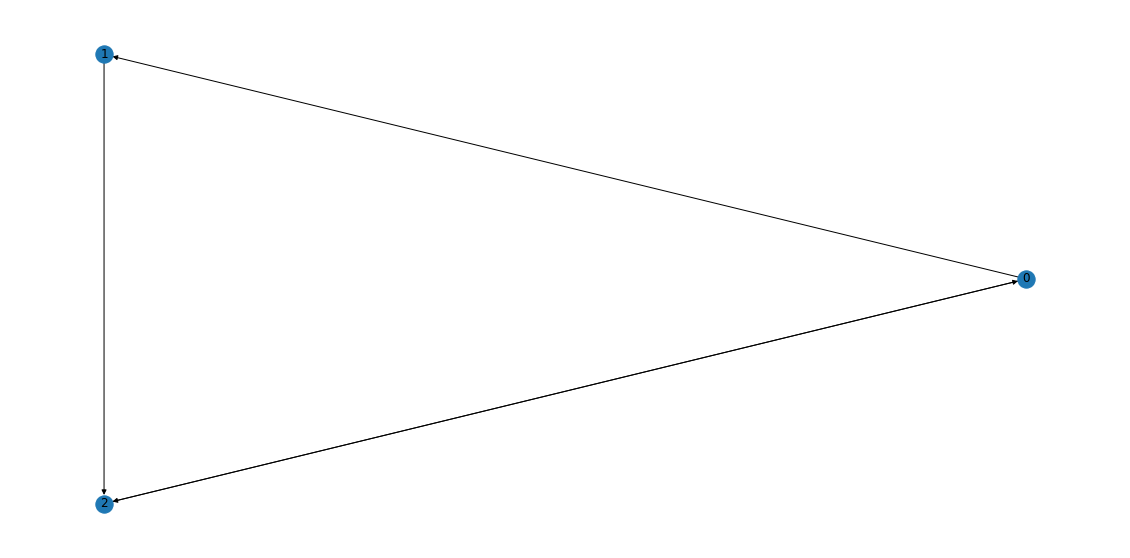

In [18]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2])
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(0,2)

print(full_page_rank(G, create_default_e(G), 1.0))     # dla d = 1.0 funkcja powinna i działa tak, jak w simple_page_rank()
show_graph(G)

print(full_page_rank(G, create_default_e(G), 0.85))

Grafy które sprawdzę to:
    * Wiki-Vote.txt
    * web-Stanford.txt

In [19]:
wiki_vote = nx.read_edgelist("Wiki-Vote.txt", create_using = nx.DiGraph)
print(full_page_rank(wiki_vote, create_default_e(wiki_vote), 0.85))

7115


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Niestety przy czytaniu danych z pliku program uznaje liczby za stringi(?). Wprowadziłem castowanie na indeks.

In [27]:
def create_default_e(graph):
    n = nx.number_of_nodes(graph)
    print(n)
    e = np.zeros((1, n))
    i = 0
    for node_a, node_b in graph.edges():
        print(node_b)
        e[0][int(node_b)] += 1
        i += 1
    return e/i

In [21]:
wiki_vote = nx.read_edgelist("Wiki-Vote.txt", create_using = nx.DiGraph)
print(full_page_rank(wiki_vote, create_default_e(wiki_vote), 0.85))

7115
1412
3352
5254
5543
7478


IndexError: index 7478 is out of bounds for axis 0 with size 7115

Podczas debugowania zauważyłem, że indeksy node'ów nie są "po kolei", dlatego musiałbym wprowadzić mało optymalne zmiany.

Postanowiłem napisać własną funkcję wczytywania plików.

In [28]:
def read_directed_graph_from_file(filename):
    graph = nx.DiGraph()
    file = open(filename, "r")
    lines = file.readlines()
    biggest_index = 0
    for line in lines:
        if line[0] == "#":
            continue
        node_a, node_b = line.split()
        graph.add_edge(int(node_a), int(node_b))
        if int(node_a) > biggest_index:
            biggest_index = int(node_a)
        if int(node_b) > biggest_index:
            biggest_index = int(node_b)
    for i in range(biggest_index+1):
        graph.add_node(i)
    file.close()
    return graph


def create_default_e(graph):   #posprzątanie "print()"
    n = nx.number_of_nodes(graph)
    e = np.zeros((1, n))
    i = 0
    for node_a, node_b in graph.edges():
        e[0][int(node_b)] += 1
        i += 1
    return e/i


In [29]:
wiki_vote = read_directed_graph_from_file("Wiki-Vote.txt")

In [30]:
print(full_page_rank(wiki_vote, create_default_e(wiki_vote), 0.9))

[[1.69044079e-04]
 [7.68391852e-04]
 [2.27888842e-03]
 ...
 [1.99833559e-05]
 [1.99833559e-05]
 [1.99833559e-05]]


In [31]:
print(full_page_rank(wiki_vote, create_default_e(wiki_vote), 0.85))

[[1.69436144e-04]
 [7.93771882e-04]
 [2.09767691e-03]
 ...
 [2.84594184e-05]
 [2.84594184e-05]
 [2.84594184e-05]]


In [32]:
print(full_page_rank(wiki_vote, create_default_e(wiki_vote), 0.75))

[[1.65123910e-04]
 [7.82693121e-04]
 [1.77576909e-03]
 ...
 [4.33711300e-05]
 [4.33711300e-05]
 [4.33711300e-05]]


In [33]:
print(full_page_rank(wiki_vote, create_default_e(wiki_vote), 0.6))

[[1.54865216e-04]
 [6.89648628e-04]
 [1.36720256e-03]
 ...
 [6.22793798e-05]
 [6.22793798e-05]
 [6.22793798e-05]]


In [34]:
print(full_page_rank(wiki_vote, create_default_e(wiki_vote), 0.5))

[[1.47848454e-04]
 [6.04833662e-04]
 [1.12814820e-03]
 ...
 [7.33685093e-05]
 [7.33685093e-05]
 [7.33685093e-05]]


In [43]:
web_stanford = read_directed_graph_from_file("web-Stanford.txt")

In [44]:
print(full_page_rank(wiki_vote, create_default_e(web_stanford), 0.9))

ValueError: shapes (1,281904) and (8298,8298) not aligned: 281904 (dim 1) != 8298 (dim 0)

Wydaje mi się, że ponad 2 miliony krawędzi to za dużo dla którejś z użytych przeze mnie bibliotek.

In [ ]:
print(full_page_rank(wiki_vote, create_default_e(web_stanford), 0.85))

In [ ]:
print(full_page_rank(wiki_vote, create_default_e(web_stanford), 0.75))

In [ ]:
print(full_page_rank(wiki_vote, create_default_e(web_stanford), 0.6))

In [ ]:
print(full_page_rank(wiki_vote, create_default_e(web_stanford), 0.5))

Dodaję generację nowego e: 1/n[1,1,1,1,...]

In [37]:
def create_different_e(graph):
    n = nx.number_of_nodes(graph)
    e = np.ones((1, n))
    return e/n

In [38]:
print(full_page_rank(wiki_vote, create_different_e(wiki_vote), 0.9))

[[1.67938000e-04]
 [7.49298725e-04]
 [2.35522965e-03]
 ...
 [1.63591405e-05]
 [1.63591405e-05]
 [1.63591405e-05]]


In [39]:
print(full_page_rank(wiki_vote, create_different_e(wiki_vote), 0.85))

[[1.69570884e-04]
 [7.83776988e-04]
 [2.19229056e-03]
 ...
 [2.40492069e-05]
 [2.40492069e-05]
 [2.40492069e-05]]


In [40]:
print(full_page_rank(wiki_vote, create_different_e(wiki_vote), 0.75))

[[1.67047640e-04]
 [7.93260473e-04]
 [1.88074994e-03]
 ...
 [3.85149057e-05]
 [3.85149057e-05]
 [3.85149057e-05]]


In [41]:
print(full_page_rank(wiki_vote, create_different_e(wiki_vote), 0.6))

[[1.57332227e-04]
 [7.15854008e-04]
 [1.45532371e-03]
 ...
 [5.81975420e-05]
 [5.81975420e-05]
 [5.81975420e-05]]


In [42]:
print(full_page_rank(wiki_vote, create_different_e(wiki_vote), 0.5))

[[1.49893479e-04]
 [6.31058473e-04]
 [1.19679645e-03]
 ...
 [7.01814206e-05]
 [7.01814206e-05]
 [7.01814206e-05]]
